In [1]:
# import all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot.pandas


**NOTE - Please change the reading directory of the dataset in the below query as per your requirments**

In [2]:
# load the dataset

loan_dataset = pd.read_csv('C:/Users/aagrv/AI ML/Lending Case Study/loan.csv', dtype = 'unicode')
loan_dataset

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Determining the shape of the datset

loan_dataset.shape

(39717, 111)

In [4]:
# Cleaning the missing data
# listing the null values columns having more than 50%

emptycol=loan_dataset.isnull().sum()
emptycol=emptycol[emptycol.values>(0.5*(loan_dataset.shape[0]))]
len(emptycol)

57

So, there are 57 columns having null values greater than 50% in the dataset

In [5]:
# Removing those 57 columns

emptycol = list(emptycol[emptycol.values>=0.3].index)
loan_dataset.drop(labels=emptycol,axis=1,inplace=True)
print(len(emptycol))

57


In [6]:
# Determining the shape of the datset

loan_dataset.shape

(39717, 54)

#### Removing categorical columns that doesn't help in analysis.

| Column_Name | Reason |
|-------------|--------|
| emp_title | Not used |
| title | Not used |
| application_type | Same value for all rows |
| url | Not used |
| pymnt_plan | Same value for all rows |
| initial_list_status | Same value for all rows |
| policy_code | Same value for all rows |

In [7]:
loan_dataset.drop(labels=['emp_title', 'title', 'application_type', 'url', 'pymnt_plan', 
                          'initial_list_status', 'policy_code', 'desc'], axis=1, inplace=True)
loan_dataset.shape

(39717, 46)

In [8]:
# Checking the columns having less null percentage

loan_dataset.isnull().sum()/len(loan_dataset)*100

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
purpose                       0.000000
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line              0.000000
inq_last_6mths                0.000000
open_acc                      0.000000
pub_rec                       0.000000
revol_bal                

#### Fill the missing values and fix formats

| Column_name | Value Filled/Changed |
|-------------|--------------|
| emp_length | Fill NA values with -1 |
| annual_inc | Convert scientific notation to regular numbers |
| dti | Convert to numerical data |
| pub_rec_bankruptcies | fill NA values with -1 |
| tax_liens | fill NA values with -1 |
| chargeoff_within_12_mths | fill NA values with -1 |
| collections_12_mths_ex_med | fill NA values with -1 |
| last_pymnt_d | fill missing values with Not Applicable |
| last_credit_pull_d | only 2 rows with missing value, so dropping those rows |
| revol_util | less than 0.5% rows with null value, so dropping those rows |
| funded_amnt | Convert to numerical values |
| int_rate | Convert to numerical values |
| installment | Convert to numerical values |
| revol_util | Convert to numerical values |
| issue_d | Convert to datetime |
| open_acc | Convert to numerical value |
| total_acc | Convert to numerical value |


In [9]:
loan_dataset['emp_length'].fillna(-1, inplace=True)
loan_dataset['annual_inc'] = pd.to_numeric(loan_dataset['annual_inc'], downcast='integer')
loan_dataset['annual_inc'] = loan_dataset['annual_inc'].astype('float') 
loan_dataset['dti'] = pd.to_numeric(loan_dataset['dti'], downcast='float')
loan_dataset['pub_rec_bankruptcies'].fillna(-1, inplace=True)
loan_dataset['tax_liens'].fillna(-1, inplace=True)
loan_dataset['chargeoff_within_12_mths'].fillna(-1, inplace=True)
loan_dataset['collections_12_mths_ex_med'].fillna(-1, inplace=True)
loan_dataset['last_pymnt_d'].fillna('NA', inplace=True)
loan_dataset.dropna(subset = ['revol_util', 'last_credit_pull_d'], inplace=True)
loan_dataset['funded_amnt'] = pd.to_numeric(loan_dataset['funded_amnt'], downcast='float')
loan_dataset['int_rate'] = loan_dataset['int_rate'].str.rstrip('%').astype('float')
loan_dataset['installment'] = loan_dataset['installment'].astype('float')
loan_dataset['revol_util'] = loan_dataset['revol_util'].str.rstrip('%').astype('float')
loan_dataset['issue_d'] = pd.to_datetime(loan_dataset['issue_d'], format='%b-%y', errors='coerce')
loan_dataset['open_acc'] = loan_dataset['open_acc'].astype('int64')
loan_dataset['total_acc'] = loan_dataset['total_acc'].astype('int64')

In [10]:
# Searching for the column for null values

loan_dataset.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_py

In [11]:
# Determining the shape of the datset

loan_dataset.shape

(39665, 46)

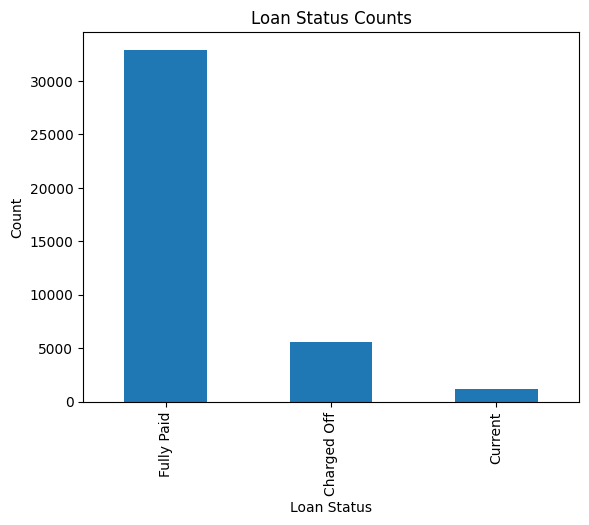

In [12]:
loan_status_count = loan_dataset['loan_status'].value_counts()
loan_status_count.plot(kind='bar', xlabel='Loan Status', ylabel='Count', title="Loan Status Counts")
plt.show()

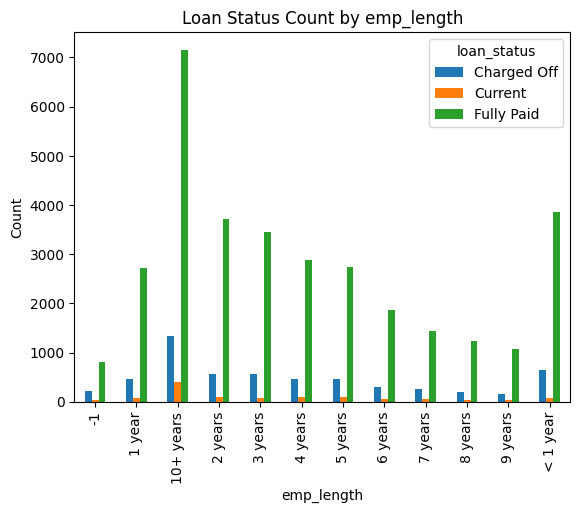

In [13]:
# Plot the bar graph of emp_length vs the loan_status
# Higher number of the defaulters have either worked for too long 10+ years or are fairly newly employed (<5 years)

df=loan_dataset.groupby(['emp_length','loan_status']).size()
df=df.unstack()
df.plot(kind='bar', xlabel='emp_length', ylabel='Count', title="Loan Status Count by emp_length")
plt.show()

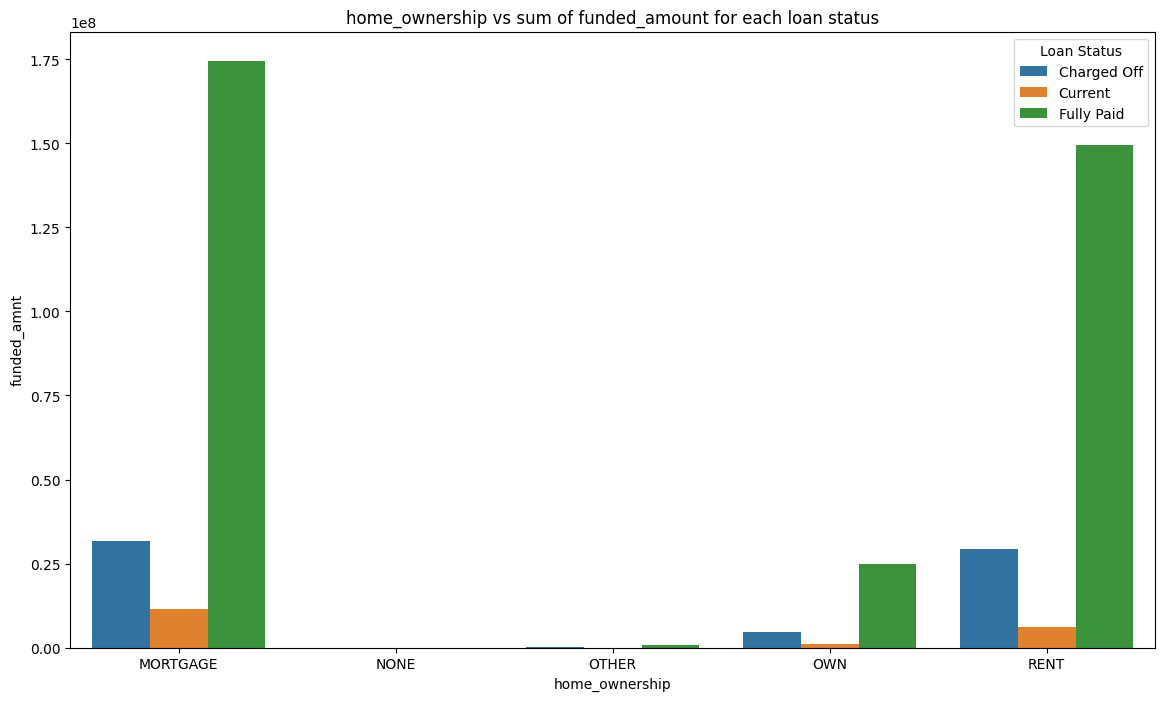

In [14]:
# home_ownership vs sum of funded_amount for each loan status
# Bulk of the loans are taken by people either living on rent or servicing a mortgage
# Most of the defaulted people are either living in a rented home or servicing a mortgage

summed_data = loan_dataset.groupby(['home_ownership', 'loan_status'])['funded_amnt'].sum().reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(x='home_ownership', y='funded_amnt', hue='loan_status', data=summed_data)
plt.title("home_ownership vs sum of funded_amount for each loan status")
plt.xlabel('home_ownership')
plt.ylabel('funded_amnt')
plt.legend(title='Loan Status')
plt.show()

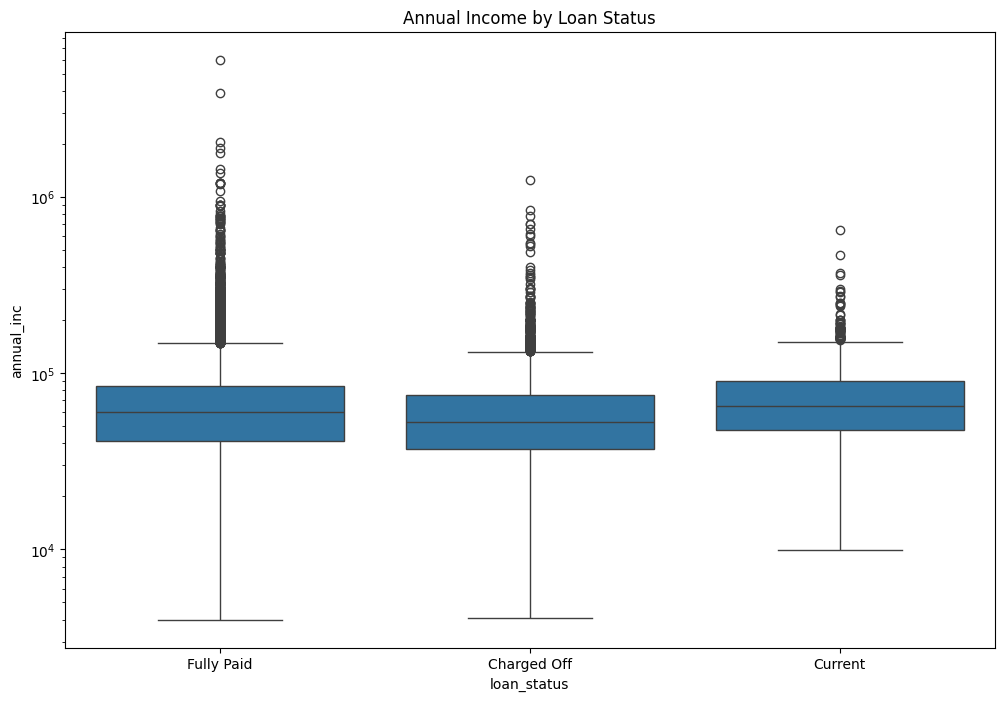

In [15]:
# Box plot showing annual income for each loan_status
# There isn't much significant difference in annual income of people who have fully paid the loan vs the ones who defualted

annual_inc_subset = loan_dataset[['annual_inc','loan_status']]
plt.figure(figsize=(12, 8))
sns.boxplot(x='loan_status', y='annual_inc', data=annual_inc_subset)
plt.yscale('log')
plt.title("Annual Income by Loan Status")
plt.show()

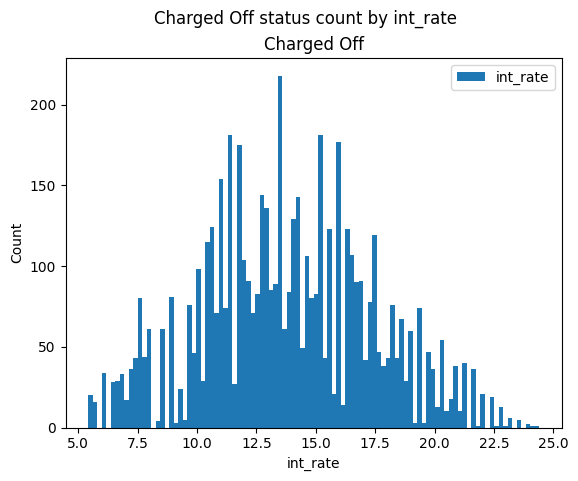

In [16]:
# Plot the bar graph of int_rate vs the Charged Off status count
# Higher number of the defaulters are within the interest rate 10 - 17%

filtered_subset = loan_dataset[loan_dataset['loan_status'].isin(['Charged Off'])]
filtered_subset.plot.hist(column=["int_rate"], by="loan_status", xlabel='int_rate', ylabel='Count', bins=100, title='Charged Off status count by int_rate')
# plt.yscale('log')
plt.show()

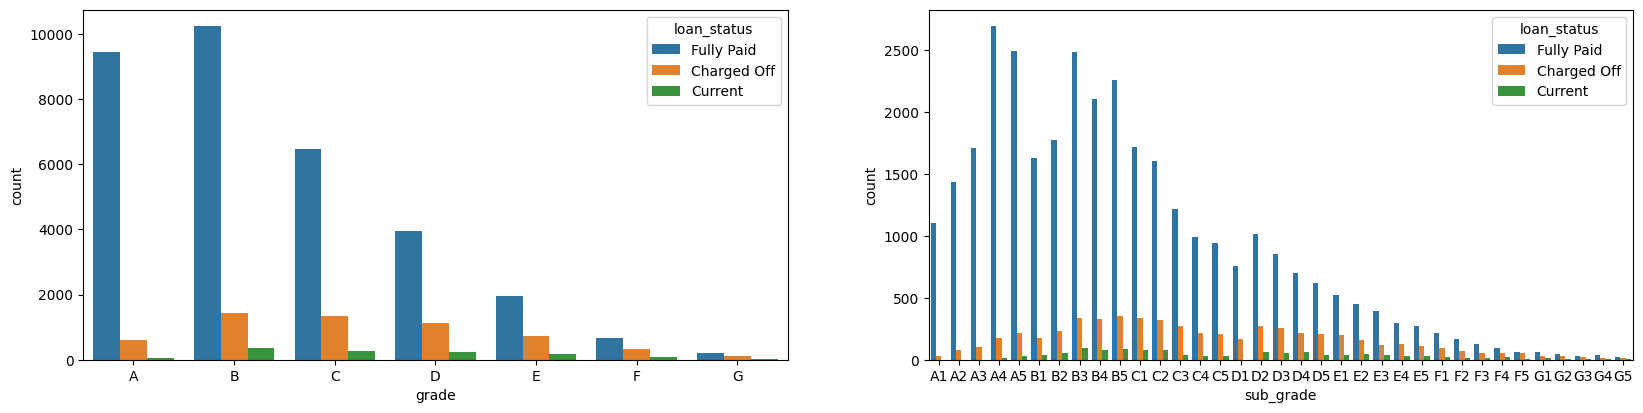

In [17]:
# Loan_status count by grade and subgrade
# Most of the Charged Off loans belong to B, C and D categories

plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
grade = sorted(loan_dataset.grade.unique().tolist())
sns.countplot(x='grade', data=loan_dataset, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(loan_dataset.sub_grade.unique().tolist())
sns.countplot(x='sub_grade', data=loan_dataset, hue='loan_status', order=sub_grade)

plt.show()


Isolating Grades B and D and recreating the countplot.

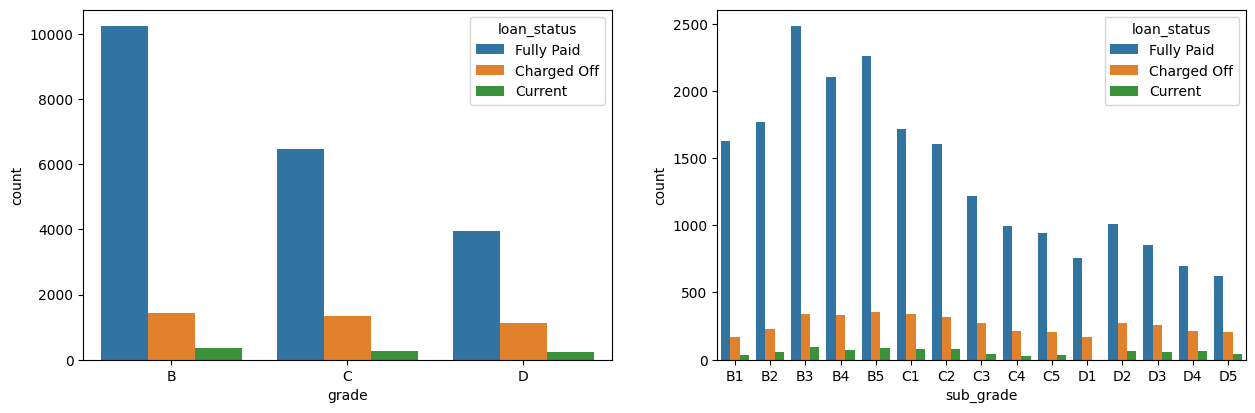

In [18]:
df = loan_dataset[(loan_dataset.grade == 'B') | (loan_dataset.grade == 'C') | (loan_dataset.grade == 'D')]

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)

plt.show()

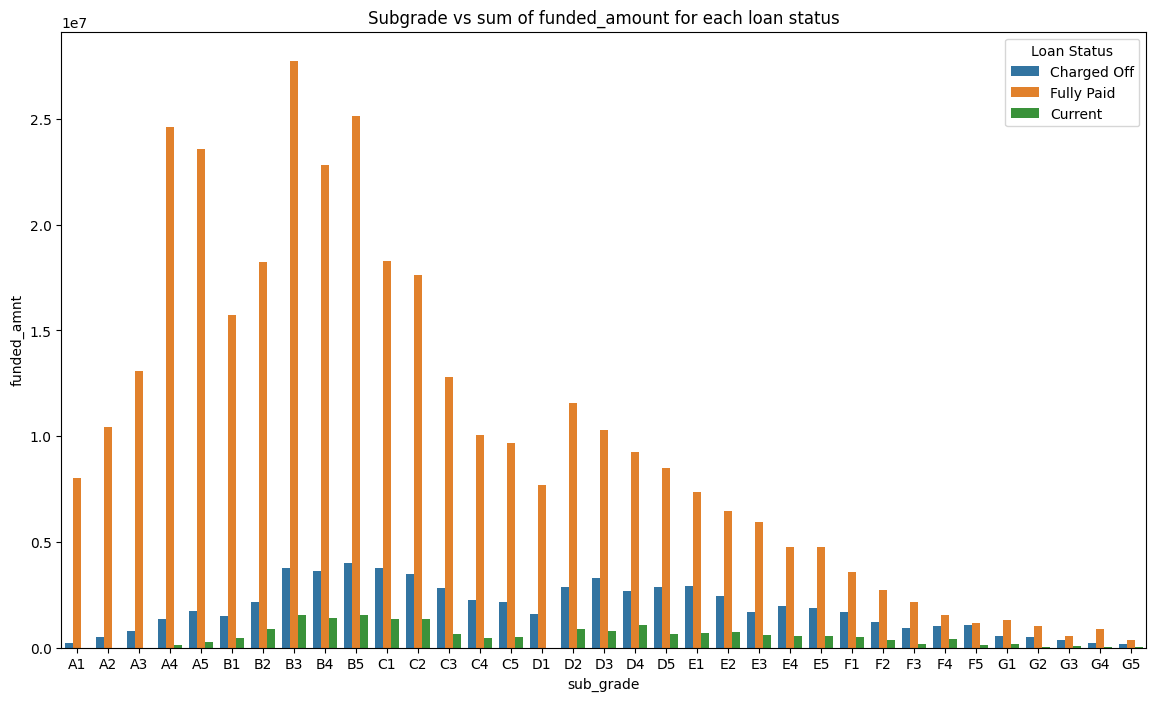

In [19]:
# Subgrade vs sum of funded_amount for each loan status

summed_data = loan_dataset.groupby(['sub_grade', 'loan_status'])['funded_amnt'].sum().reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(x='sub_grade', y='funded_amnt', hue='loan_status', data=summed_data)
plt.title("Subgrade vs sum of funded_amount for each loan status")
plt.xlabel('sub_grade')
plt.ylabel('funded_amnt')
plt.legend(title='Loan Status')
plt.show()

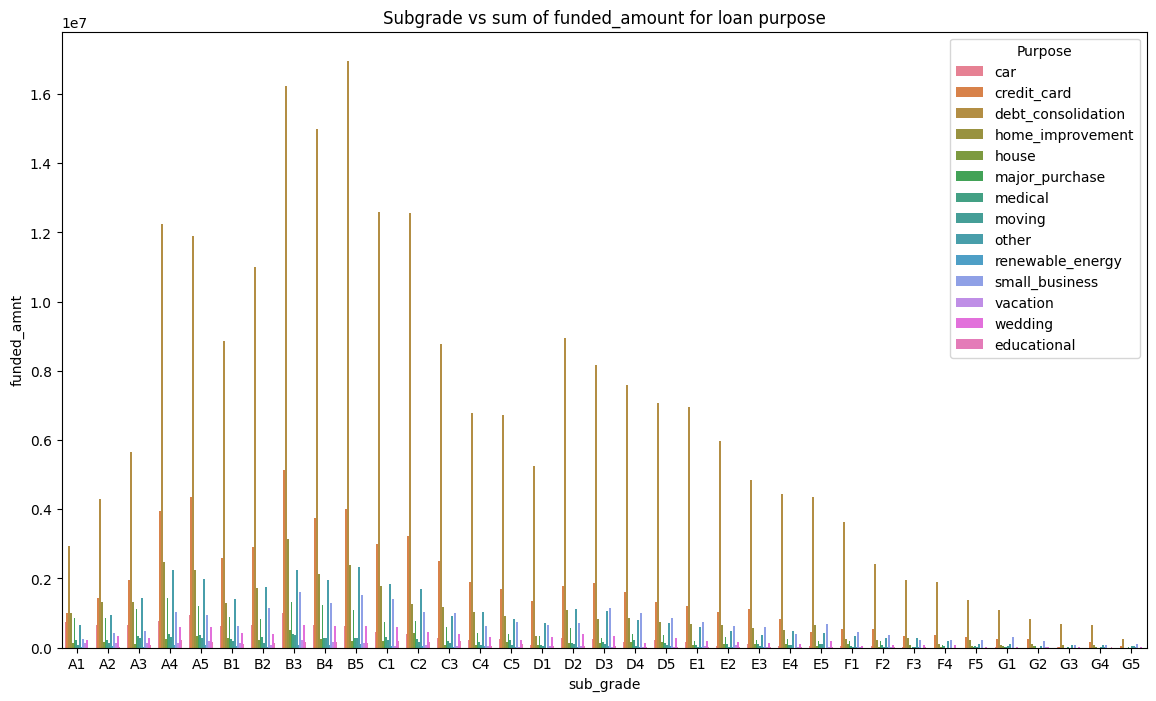

In [20]:
# Subgrade vs sum of funded_amount for loan purpose
# Bulk of the loan is taken for debt_consolidation. This is true for all sub-grades

summed_data = loan_dataset.groupby(['sub_grade', 'purpose'])['funded_amnt'].sum().reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(x='sub_grade', y='funded_amnt', hue='purpose', data=summed_data)
plt.title("Subgrade vs sum of funded_amount for loan purpose")
plt.xlabel('sub_grade')
plt.ylabel('funded_amnt')
plt.legend(title='Purpose')
plt.show()

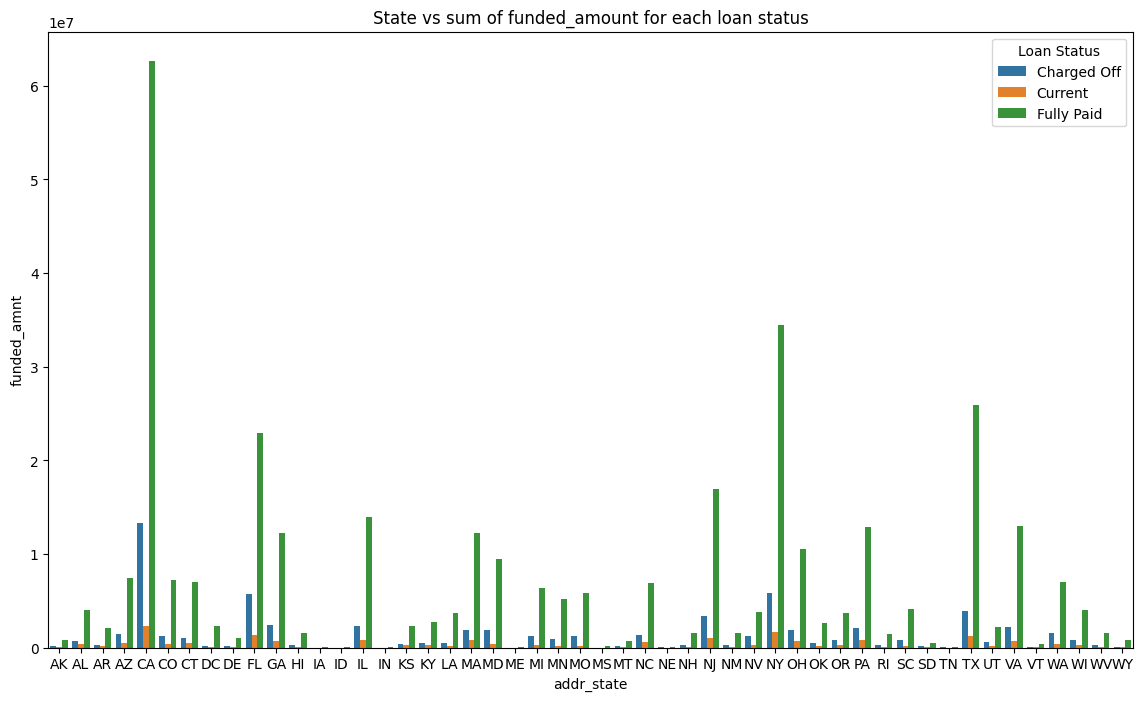

In [21]:
# State vs sum of funded_amount for each loan status
# CA has the most number of Charged Off loan status followed by NY and FL

summed_data = loan_dataset.groupby(['addr_state', 'loan_status'])['funded_amnt'].sum().reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(x='addr_state', y='funded_amnt', hue='loan_status', data=summed_data)
plt.title("State vs sum of funded_amount for each loan status")
plt.xlabel('addr_state')
plt.ylabel('funded_amnt')
plt.legend(title='Loan Status')
plt.show()

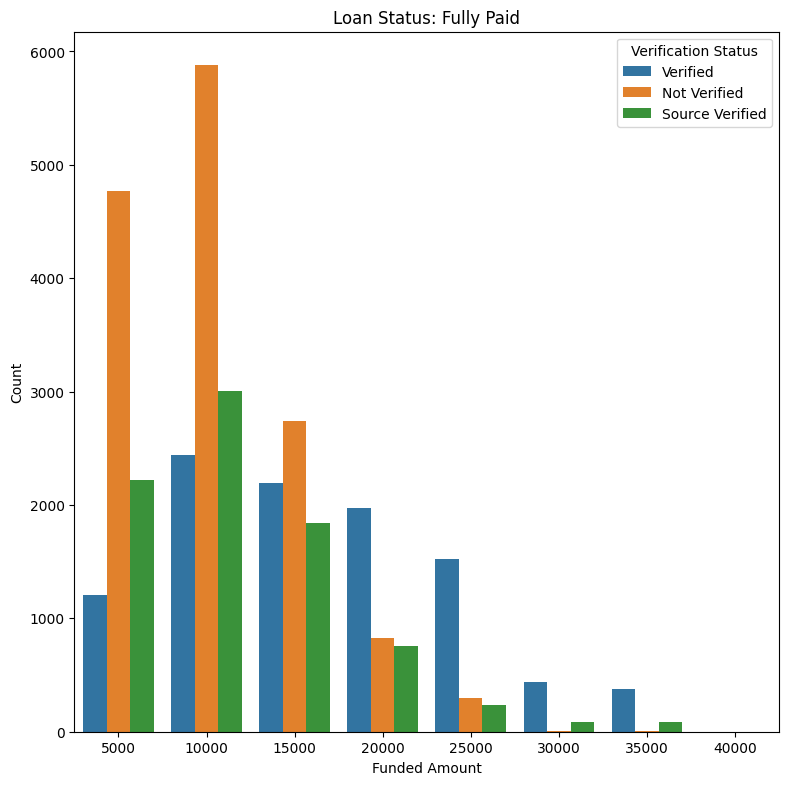

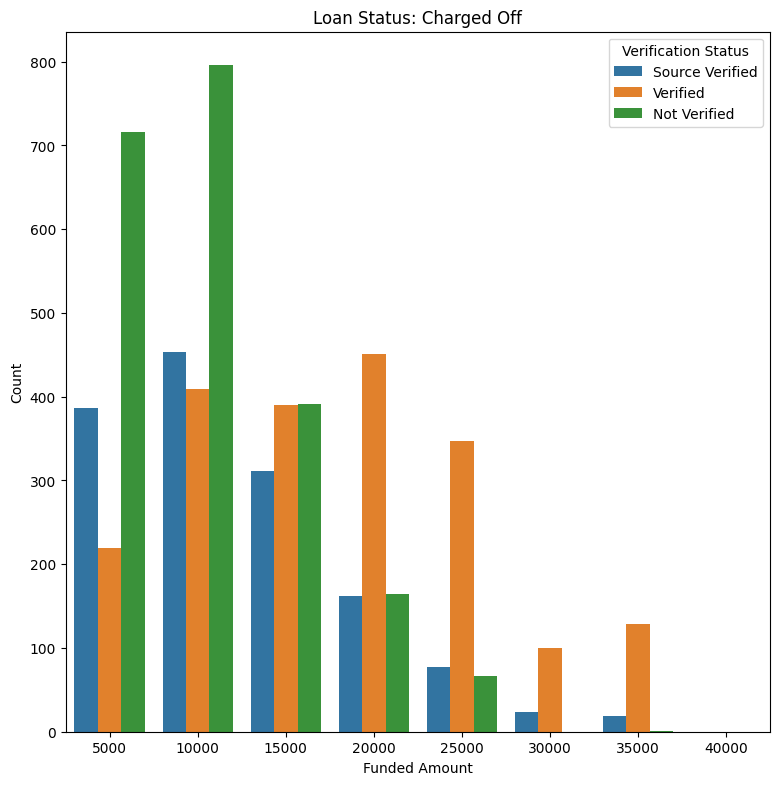

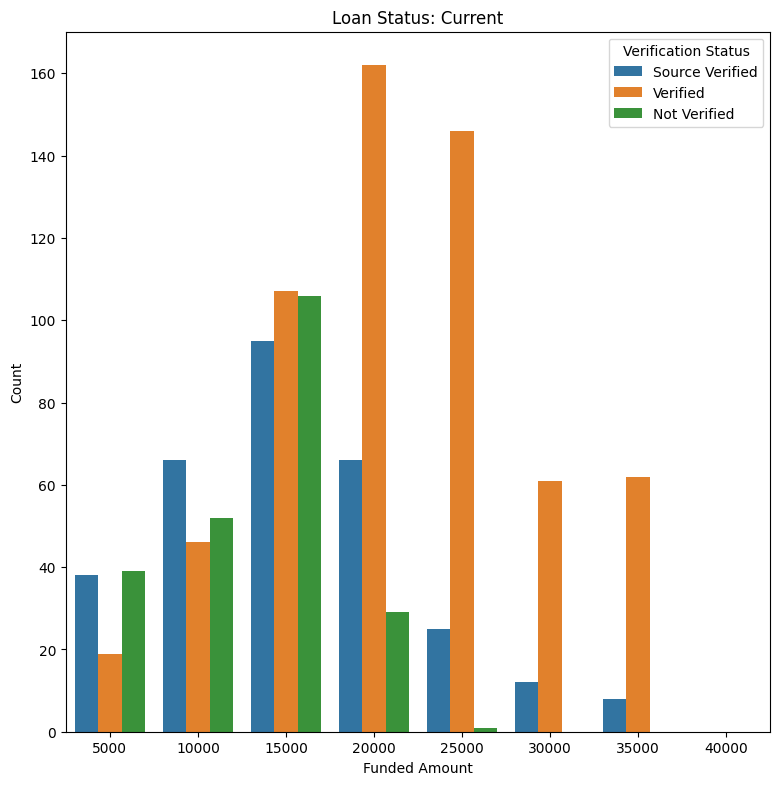

In [22]:
# Varification status count for funded amount
# For Charged Off status, a very high count of loans of amount upto 10000 are funded without verification
# And for funded amount between 10000-15000 too the count of not verified loans is significant

verification_status_subset = loan_dataset[['funded_amnt','loan_status','verification_status']].copy()
verification_status_subset['funded_amnt_slot'] = pd.cut(verification_status_subset['funded_amnt'], bins=range(0, 41000, 5000), labels=[f'{i+5000}' for i in range(0, 39000, 5000)])
loan_statuses = verification_status_subset['loan_status'].unique()

for i, loan_status in enumerate(loan_statuses, 1):
    plt.figure(figsize = (20, 20))
    plt.subplot(2,2,i)
    sns.countplot(x='funded_amnt_slot', hue='verification_status', data=verification_status_subset[verification_status_subset['loan_status'] == loan_status])
    plt.title(f'Loan Status: {loan_status}')
    plt.xlabel('Funded Amount')
    plt.ylabel('Count')
    plt.legend(title = 'Verification Status')
    plt.show()


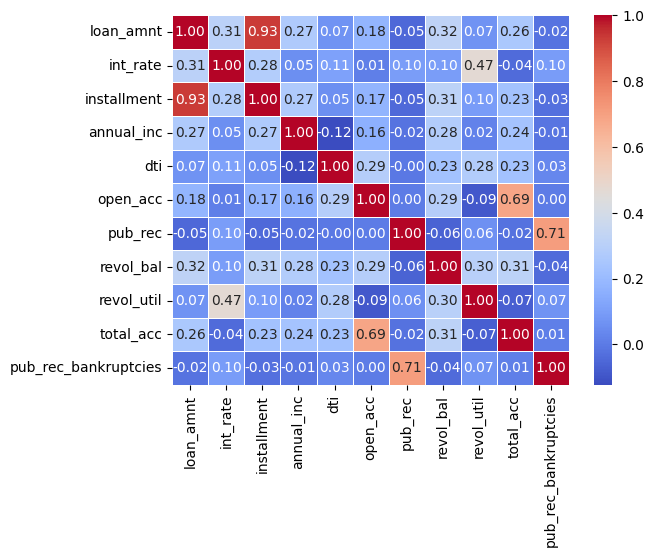

In [23]:
# correlation table between the numerical columns
# We noticed almost perfect correlation between "loan_amnt" and "installment" 

correlation_subset = loan_dataset[['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies']]
correlation_table = correlation_subset.corr()
sns.heatmap(correlation_table, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

In [24]:
loan_dataset.groupby('loan_status')['loan_amnt'].describe(percentiles=[0.25, 0.5, 0.75])

,count,unique,top,freq
loan_status,,,,
Charged Off,5610,487,10000,362
Current,1140,266,20000,90
Fully Paid,32915,830,10000,2446


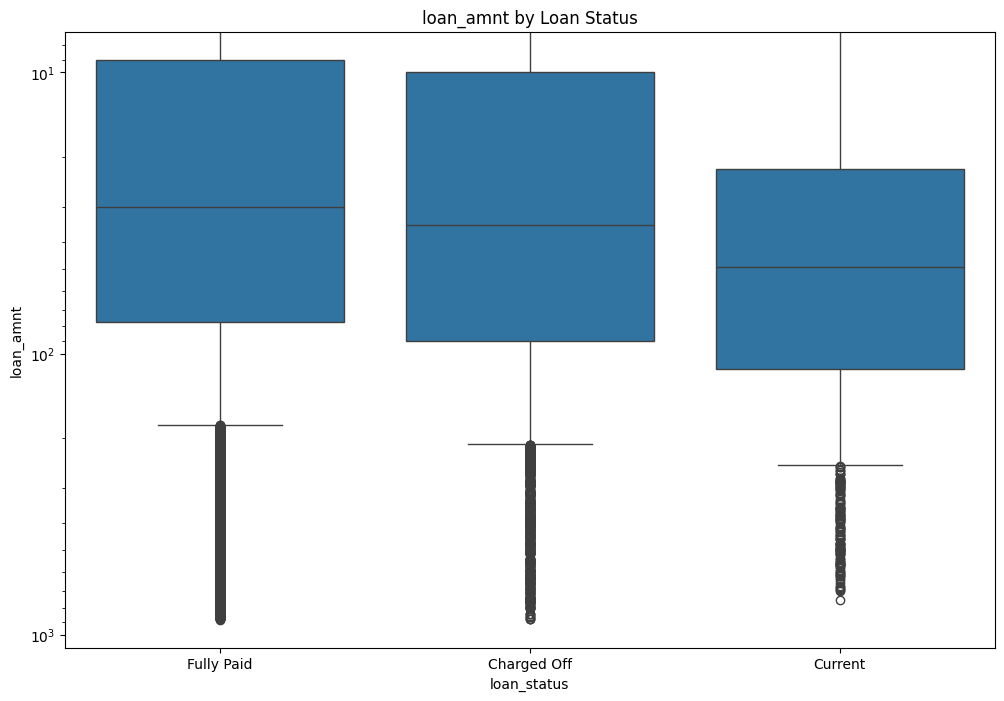

In [25]:
# Box plot showing loan_amnt for each loan_status
# There isn't much significant difference in loan_amnt of people who have fully paid the loan vs the ones who defualted

loan_amnt_subset = loan_dataset[['loan_amnt','loan_status']]
plt.figure(figsize=(12, 8))
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_amnt_subset)
plt.yscale('log')
plt.title("loan_amnt by Loan Status")
plt.show()

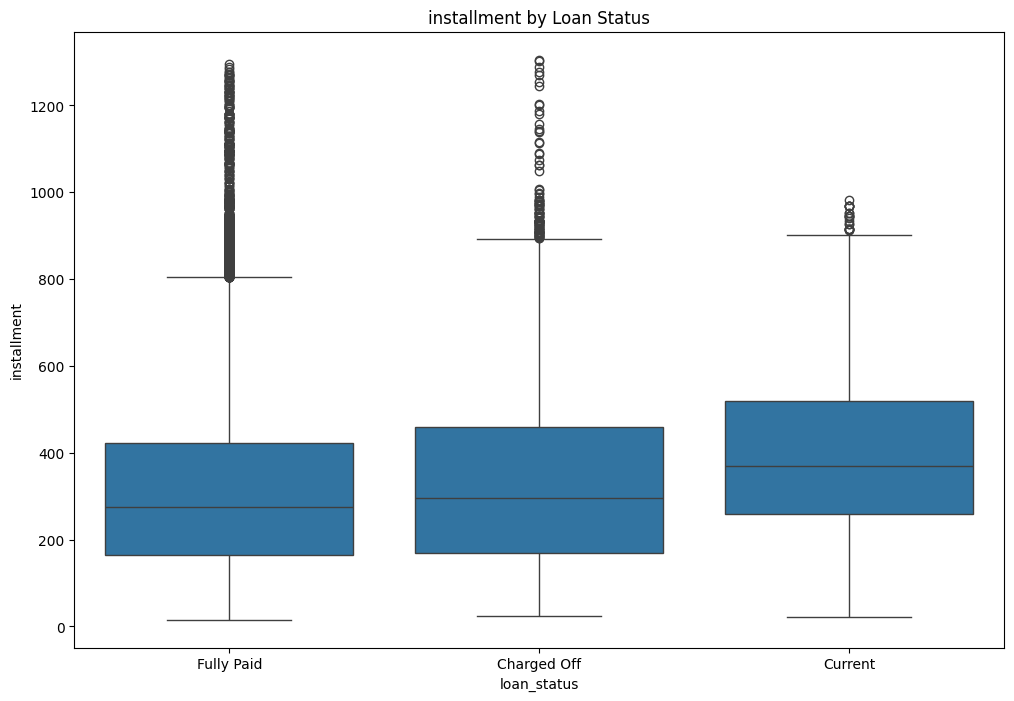

In [26]:
# Box plot showing installment for each loan_status
# There isn't much significant difference in installment of people who have fully paid the loan vs the ones who defualted

loan_amnt_subset = loan_dataset[['installment','loan_status']]
plt.figure(figsize=(12, 8))
sns.boxplot(x='loan_status', y='installment', data=loan_amnt_subset)
plt.title("installment by Loan Status")
plt.show()

In [27]:
dti = loan_dataset[loan_dataset['dti']<=50].hvplot.hist(
    y='dti', by='loan_status', bins=50, width=300, height=350, 
    title="dti (<=30) Distribution", xlabel='dti', ylabel='Count', 
    alpha=0.3, legend='top'
)

title="Loan Status by number of open_credit_lines"

open_acc = loan_dataset.hvplot.hist(
    y='open_acc', by='loan_status', bins=50, width=300, height=350, 
    title=title, xlabel='The number of open credit lines', ylabel='Count', 
    alpha=0.4, legend='top'
)

title="Loan Status by total_credit_lines"

total_acc = loan_dataset.hvplot.hist(
    y='total_acc', by='loan_status', bins=50, width=300, height=350, 
    title=title, xlabel='The total number of credit lines', ylabel='Count', 
    alpha=0.4, legend='top'
)

dti + open_acc + total_acc

:Layout
   .NdOverlay.I   :NdOverlay   [loan_status]
      :Histogram   [dti]   (dti_count)
   .NdOverlay.II  :NdOverlay   [loan_status]
      :Histogram   [open_acc]   (open_acc_count)
   .NdOverlay.III :NdOverlay   [loan_status]
      :Histogram   [total_acc]   (total_acc_count)

In [28]:
title="Loan Status by Revolving line utilization rate"

revol_util = loan_dataset.hvplot.hist(
    y='revol_util', by='loan_status', bins=50, width=350, height=400, 
    title=title, xlabel='Revolving line utilization rate', ylabel='Count', 
    alpha=0.4, legend='top'
)

revol_util

:NdOverlay   [loan_status]
   :Histogram   [revol_util]   (revol_util_count)